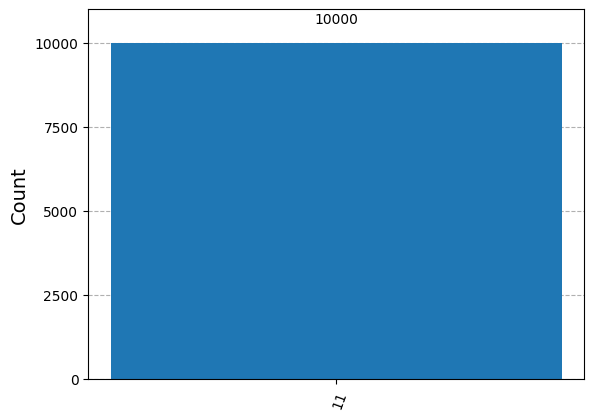

In [58]:
from qiskit import *
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Define the quantum circuit for Deutsch-Jozsa with 2 input qubits
n = 2  # Number of input qubits
qc = QuantumCircuit(n+1, n)

# Step 1: Initialize last qubit to |1⟩
qc.x(n)

# Step 2: Apply Hadamard to all qubits
qc.h(range(n+1))

# Step 3: Oracle (example: balanced function f(x) = x1 ⊕ x2)
qc.cx(0, n)
qc.cx(1, n)

# Step 4: Apply Hadamard to first n qubits
qc.h(range(n))

# Step 5: Measure first n qubits
qc.measure(range(n), range(n))

# Run the quantum circuit
backend = QasmSimulator()
result = backend.run(qc.reverse_bits(), shots=1e4).result()
counts = result.get_counts()
plot_histogram(counts)


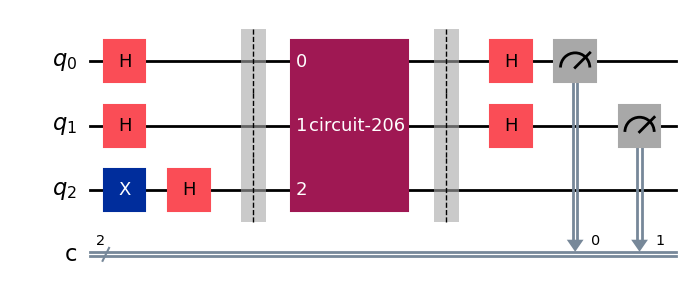

In [55]:
qc.draw(output='mpl')

In [ ]:
from qiskit import *
from qiskit_aer import QasmSimulator
from qiskit.quantum_info import Statevector
from numpy.random import randint

In [307]:
def create_constant_oracle(n):
    constant_oracle = QuantumCircuit(n+1)
    constant_oracle.x(n)
    return constant_oracle


def create_balanced_oracle(n):
    balanced_oracle = QuantumCircuit(n + 1)
    
    balanced_oracle.cx(0, n)  # Flips the last qubit if the first qubit is |1⟩

    return balanced_oracle


def generate_random_oracle(n):
    # oracle = QuantumCircuit(n + 1)
    # Flip a coin: 0 for constant, 1 for balanced
    coin_flip = randint(2)

    if coin_flip == 0:
        oracle = create_constant_oracle(n)
    else:
        oracle = create_balanced_oracle(n)        
    return oracle

def construct_dj_circuit(n, oracle):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.barrier()
    qc.compose(oracle, inplace=True)
    qc.barrier()
    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

def run_dj_circuit(qc):
    backend = QasmSimulator()
    result = backend.run(qc.reverse_bits(), shots=1e4).result()
    counts = result.get_counts()
    return counts

def main():
    # n = int(input("Choose n: "))  # Choose number of input qubits
    n = 3
    oracle = generate_random_oracle(n)      # Randomly generate an oracle
    qc = construct_dj_circuit(n, oracle)    # Create the Deutsch-Jozsa circuit
    counts = run_dj_circuit(qc)             # Run the circuit

    print(qc)                               # Print the circuit
    print(counts)                           # Print measurement results

    if '0' * n in counts:                   # if output is ever 0^n
        print("CONSTANT ORACLE")
    else:                                   # if output is never 0^n
        print("BALANCED ORACLE")


# Run the main function
if __name__ == "__main__":
    main()


     ┌───┐      ░       ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───────░─┤ H ├┤M├──────
     ├───┤      ░       ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───────░─┤ H ├─╫─┤M├───
     ├───┤      ░       ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───────░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌───┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘ ░       ║  ║  ║ 
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2 
{'000': 10000}
CONSTANT ORACLE
